In [1]:
from quantileRegression import quantileRegression
import numpy as np
import runNumbers as rn

Welcome to ROOTaaS 6.06/08


In [2]:
# Variable you want to correct
ylist = ["R9"]
#, "S4", "SigmaIeIe", "EtaWidth", "PhiWidth", "CovarianceIphiIphi", "SigmaRR", 'CovarianceIetaIphi', 'PhoIso03', 'ChIso03', 'ChIso03worst']
# ylist = ['PhoIso03', 'ChIso03', 'ChIso03worst']
# ylist = ["SigmaIeIe"] 

# Input variables used for the regression
X = ['Pt', 'ScEta', 'Phi', 'rho']  # <<-- list

In [3]:
# Set the quantiles 
quantiles = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ]
print "Number of quantiles ", len(quantiles)

Number of quantiles  9


In [4]:
# Initialize the quantile regression object for mc
qr_mc = quantileRegression("mc")
#qr_mc.changeUncorr()

In [5]:
# This is what you want to correct
print "Load the mc dataframe"
startEvtmc = 0
stopEvtmc  = 2000000
qr_mc.loadDF("/mnt/t3nfs01/data01/shome/mdonega/lxplus/work/CMSSW_8_0_26_patch1/src/diphotons/Analysis/macros/double_ele_v9_moriond17_mc/",
             "cicNoSigmaIetaIeta/trees/",
             ["DYJetsToLL_13TeV_EBHighR9", "DYJetsToLL_13TeV_EBLowR9", "DYJetsToLL_13TeV_EEHighR9", "DYJetsToLL_13TeV_EELowR9" ],
             startEvtmc, stopEvtmc, 12345)

Load the mc dataframe
NT branches: 
['run', 'rho', 'nvtx', 'mass', 'weight', 'leadEleMatch', 'subleadEleMatch', 'leadPt', 'leadScEta', 'leadPhi', 'leadScEnergy', 'leadScPreshowerEnergy', 'leadSigmaRR', 'leadPhoIso03', 'leadChIso03', 'leadChIso03worst', 'leadPhoIDMVA', 'leadR9', 'leadS4', 'leadEtaWidth', 'leadPhiWidth', 'leadSigmaIeIe', 'leadCovarianceIetaIphi', 'leadCovarianceIphiIphi', 'subleadPt', 'subleadScEta', 'subleadPhi', 'subleadScEnergy', 'subleadScPreshowerEnergy', 'subleadSigmaRR', 'subleadPhoIso03', 'subleadChIso03', 'subleadChIso03worst', 'subLeadPhoIDMVA', 'subleadR9', 'subleadS4', 'subleadEtaWidth', 'subleadPhiWidth', 'subleadSigmaIeIe', 'subleadCovarianceIetaIphi', 'subleadCovarianceIphiIphi']
['cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EBHighR9', 'cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EBLowR9', 'cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EEHighR9', 'cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EELowR9']
Adding trees into a DataFrame
  adding  cicNoSigmaIetaIeta/trees/D

In [6]:
print "Get the corrected data-mc values"
qr_mc.correctAllY(X, ylist, quantiles, EBEE="EE" )

Get the corrected data-mc values
Corrected variables file (e.g.  correctedTargets_EE.h5  ) does not exists. This will take a while...
Correct EE :
ScEta  <  -1.57  or  1.57  <  ScEta
           index  run        rho  nvtx        mass    weight          Pt  \
0        5193559    1  14.188653    28   86.355209  0.097618   37.607571   
3        6913144    1  22.369999    21   83.329445  0.069604   31.968596   
7        7042188    1  22.527895    37   86.630424  0.005752   37.101463   
12       6453174    1   8.240348     8   94.754677 -0.100126   62.334549   
18       5538211    1  21.769867    25   87.796600  0.094453   33.256905   
21       5642586    1   8.423097     9   80.295097  0.102639   34.098232   
25       5235499    1  12.283010    16   95.470528  0.099424   40.829628   
41       6221895    1  13.126222    15   91.935303  0.091914   52.721737   
43       6713858    1  30.237267    43   89.064682  0.000658   43.139690   
45       5771738    1  12.338493    22   78.667458  0.069

In [7]:
#y_mc   = qr_mc.getY(y)
#y_mccorr = qr_mc.getCorrectedY(y)
#print y_mc
#print y_mccorr
dfmc = qr_mc.getDF()

In [8]:
# Plot data, mc, mc_corrr
# just need to load the data for plotting 
qr_data = quantileRegression("data")
startEvtdata = 0
stopEvtdata   = 2000000
print "Load the data dataframe"
qr_data.loadDF("/mnt/t3nfs01/data01/shome/mdonega/lxplus/work/CMSSW_8_0_26_patch1/src/diphotons/Analysis/macros/double_ele_v9_moriond17_data/",
               "cicNoSigmaIetaIeta/trees/",
               ["Data_13TeV_EBHighR9", "Data_13TeV_EBLowR9", "Data_13TeV_EEHighR9", "Data_13TeV_EELowR9" ],
               startEvtdata, stopEvtdata, rn.run2016B[0],rn.run2016D[1])

Load the data dataframe
NT branches: 
['run', 'rho', 'nvtx', 'mass', 'weight', 'leadHLT_Ele27_WPTight_Gsf_vMatch', 'subleadHLT_Ele27_WPTight_Gsf_vMatch', 'leadEleMatch', 'subleadEleMatch', 'leadPt', 'leadScEta', 'leadPhi', 'leadScEnergy', 'leadScPreshowerEnergy', 'leadSigmaRR', 'leadPhoIso03', 'leadChIso03', 'leadChIso03worst', 'leadPhoIDMVA', 'leadR9', 'leadS4', 'leadEtaWidth', 'leadPhiWidth', 'leadSigmaIeIe', 'leadCovarianceIetaIphi', 'leadCovarianceIphiIphi', 'subleadPt', 'subleadScEta', 'subleadPhi', 'subleadScEnergy', 'subleadScPreshowerEnergy', 'subleadSigmaRR', 'subleadPhoIso03', 'subleadChIso03', 'subleadChIso03worst', 'subLeadPhoIDMVA', 'subleadR9', 'subleadS4', 'subleadEtaWidth', 'subleadPhiWidth', 'subleadSigmaIeIe', 'subleadCovarianceIetaIphi', 'subleadCovarianceIphiIphi']
['cicNoSigmaIetaIeta/trees/Data_13TeV_EBHighR9', 'cicNoSigmaIetaIeta/trees/Data_13TeV_EBLowR9', 'cicNoSigmaIetaIeta/trees/Data_13TeV_EEHighR9', 'cicNoSigmaIetaIeta/trees/Data_13TeV_EELowR9']
Adding trees 

In [17]:
#y_data   = qr_data.getY(y)
dfdata = qr_data.getDF()
#data get EB data
dfdata   = dfdata  .query("(-2.5< ScEta & ScEta < -1.57) | (1.57 < ScEta & ScEta <2.5)") 

In [18]:
# Some basic plots
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook
plt.style.use('ggplot')

In [19]:
# Diagnostic plots  --> scatter plot super heavy !
#plotQ = qr_mc.plotQuantilesR9(quantiles)
# Pt, ScEta, Phi, rho
# plotQpt  = qr_mc.plotQuantiles(quantiles, 'Pt',    10, 20, 60,      'R9', '$pt$',  'R$_9$', "./meanR9_pt.pdf")
# plotQpt.plot()
# plotQeta = qr_mc.plotQuantiles(quantiles, 'ScEta', 10, -2.5, 2.5,   'R9', '$eta$', 'R$_9$', "./meanR9_eta.pdf")
# plotQeta.plot()
# plotQphi = qr_mc.plotQuantiles(quantiles, 'Phi',   10, -3.14, 3.14, 'R9', '$phi$', 'R$_9$', "./meanR9_phi.pdf")
# plotQphi.plot()
# plotQrho = qr_mc.plotQuantiles(quantiles, 'rho',   10, 0, 50,       'R9', '$rho$', 'R$_9$', "./meanR9_rho.pdf")
# plotQrho.plot()

In [20]:
# fig = plt.figure()
# ax1 = fig.add_subplot(2, 2, 1)
# h_mc     = y_mc    .hist(bins=100, alpha = 1, color='g')
# ax2 = fig.add_subplot(2, 2, 2)
# h_mccorr = y_mccorr.hist(bins=100, alpha = 1, color='b')
# ax3 = fig.add_subplot(2, 2, 3)
# h_data   = y_data  .hist(bins=100, alpha = 1, color='r')
# print "mc    ", y_mc.count()
# print "data  ", y_data.count()
# print "mccorr", y_mccorr.count()

In [21]:
# fig2 = plt.figure()
# h_data    = y_data  .hist(bins=100, alpha = 1.0, color='r', normed = 1)
# h_mc      = y_mc    .hist(bins=100, alpha = 0.5, color='g', normed = 1)
# h_mccorr2 = y_mccorr.hist(bins=100, alpha = 0.5, color='b', normed = 1)
# fig2.savefig("test.pdf")

['R9']
plotting  R9


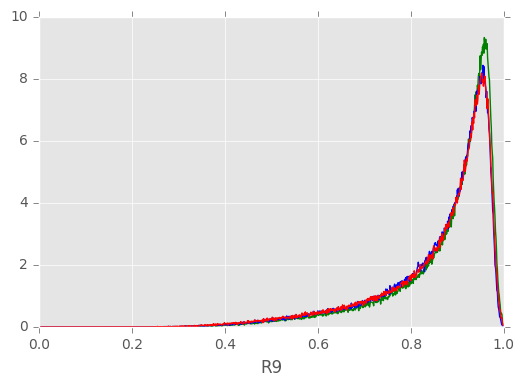

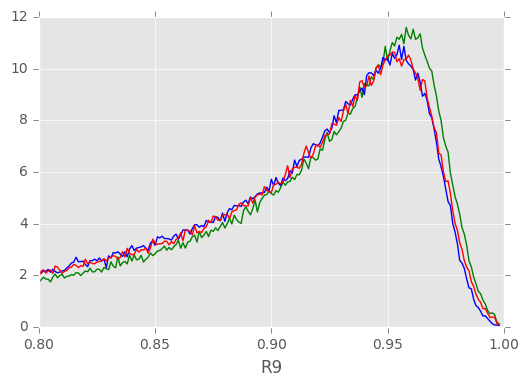

In [22]:
# dfmcEB = dfmc.query('-1.44 < ScEta and ScEta < 1.44')
# dfdataEB = dfdata.query('-1.44 < ScEta and ScEta < 1.44')
# dfmcEB = dfmc.query('ScEta <-1.57 or 1.57 < ScEta')
# dfdataEB = dfdata.query('ScEta <-1.57 or 1.57 < ScEta')

print ylist
for yvar in ylist:
    yvarcorr = yvar+"_corr"
    print "plotting ", yvar

    rv = []
    if yvar == "R9":
        rv  = np.arange(0.0,1.0,0.001)
        rv2 = np.arange(0.8,1.0,0.001)
    if yvar == "S4":
        rv  = np.arange(0.0,1.0,0.001)
        rv2 = np.arange(0.8,1.0,0.001)
    if yvar == "SigmaIeIe":
        rv = np.arange(0.0,0.015,0.0001)
        rv2 = np.arange(0.015,0.030,0.0001)
    if yvar == "EtaWidth":
        rv = np.arange(0.0,0.05,0.0001)
        rv2 = np.arange(0.005,0.025,0.0001)
    if yvar == "PhiWidth":
        rv = np.arange(0.0,0.2,0.001)
        rv2 = np.arange(0.0,0.05,0.0003)
    if yvar == "CovarianceIphiIphi":
        rv  = np.arange(0.0, 0.02,0.0001)
        rv2 = np.arange(0.02, 0.05,0.0005)
    if yvar == "SigmaRR":
        rv = np.arange(1, 12.0,0.1) 
        rv2 = np.arange(1, 12.0,0.1)
    if yvar == "CovarianceIetaIphi":
        rv = np.arange(-0.0002, 0.0002,0.0000001) 
        rv2 = np.arange(-0.00005, 0.00005,0.0000001)
    if yvar == "PhoIso03":
        rv = np.arange(-0.05, 0.05,0.0005) 
        rv2 = np.arange(0.1, 5.0,0.05)
    if yvar == "ChIso03":
        rv = np.arange(-0.05, 0.05,0.0005) 
        rv2 = np.arange(0.1, 5.,0.05)
    if yvar == "ChIso03worst":
        rv = np.arange(-0.05, 0.05,0.0005) 
        rv2 = np.arange(0.1, 5.0, 0.05)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel(yvar)
    mc_bins, _edges = np.histogram(dfmc[yvar], rv, normed = 1)
    edges = _edges[:len(_edges)-1]
    plt.plot(edges,mc_bins,"g")
    mccorr_bins, _edges = np.histogram(dfmc[yvarcorr], rv, normed = 1)
    edges = _edges[:len(_edges)-1]
    plt.plot(edges,mccorr_bins,"b")
    data_bins, _edges = np.histogram(dfdata[yvar], rv, normed = 1)
    edges = _edges[:len(_edges)-1]
    plt.plot(edges  ,data_bins,"r")

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel(yvar)
    mc_bins, _edges = np.histogram(dfmc[yvar], rv2, normed = 1)
    edges = _edges[:len(_edges)-1]
    plt.plot(edges,mc_bins,"g")
    mccorr_bins, _edges = np.histogram(dfmc[yvarcorr], rv2, normed = 1)
    edges = _edges[:len(_edges)-1]
    plt.plot(edges,mccorr_bins,"b")
    data_bins, _edges = np.histogram(dfdata[yvar], rv2, normed = 1)
    edges = _edges[:len(_edges)-1]
    plt.plot(edges  ,data_bins,"r")

    
    
# mc_bins, _edges = np.histogram(y_mc, rv, normed = 1)
# edges = _edges[:len(_edges)-1]
# plt.plot(edges,mc_bins,"g")
# mccorr_bins, _edges = np.histogram(y_mccorr, rv, normed = 1)
# edges = _edges[:len(_edges)-1]
# plt.plot(edges,mccorr_bins,"b")
# data_bins, _edges = np.histogram(y_data, rv, normed = 1)b

# edges = _edges[:len(_edges)-1]
# plt.plot(edges  ,data_bins,"r")

In [23]:
#our variables are dfmc and dfdata, let's work with them.
#let's see how the profiles generally are.
#poors man profile plot
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt

def Profile(x,y,nbins,xmin,xmax,ax, color):
    df = DataFrame({'x' : x , 'y' : y})
    
    binedges = xmin + ((xmax-xmin)/nbins) * np.arange(nbins+1)
    df['bin'] = np.digitize(df['x'],binedges)

    # print df
    
    bincenters = xmin + ((xmax-xmin)/nbins)*np.arange(nbins) + ((xmax-xmin)/(2*nbins))
    # print bincenters
    
    ProfileFrame = DataFrame({'bincenters' : bincenters, 'N' : df['bin'].value_counts(sort=False)},index=range(1,nbins+1))
    # ProfileFrame['N'] = ProfileFrame['N'].fillna(1)
    # print ProfileFrame['N']

    bins = ProfileFrame.index.values
    for bin in bins:
        ProfileFrame.ix[bin,'ymean']      = df.ix[df['bin']==bin,'y'].mean()
        ProfileFrame.ix[bin,'yStandDev']  = df.ix[df['bin']==bin,'y'].std()
        ProfileFrame.ix[bin,'yMeanError'] = ProfileFrame.ix[bin,'yStandDev'] / np.sqrt(ProfileFrame.ix[bin,'N'])

    ProfileFrame['ymean']      = ProfileFrame['ymean'].fillna(0)
    ProfileFrame['yMeanError'] = ProfileFrame['yMeanError'].fillna(0)
    #ax.errorbar(ProfileFrame['bincenters'], ProfileFrame['ymean'], yerr=np.array(ProfileFrame['yMeanError']), c=color) #, xerr=(xmax-xmin)/(2*nbins), fmt=None) 
    ax.errorbar(ProfileFrame['bincenters'], ProfileFrame['ymean'], c=color) 
    return ax



plotting  R9


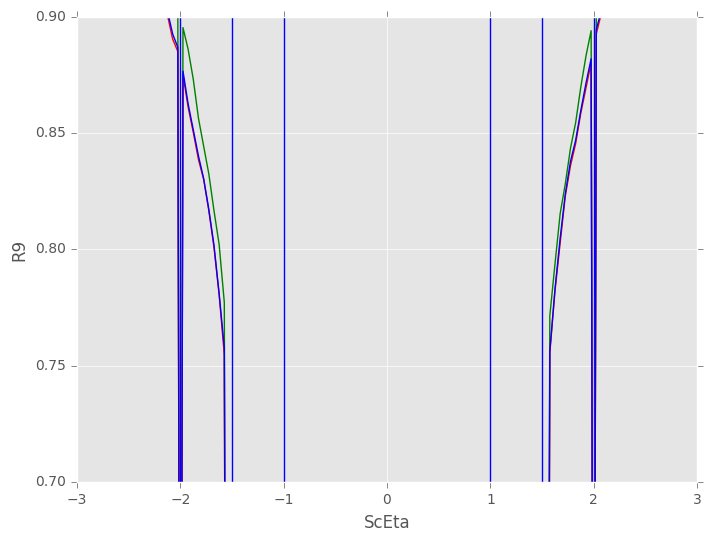

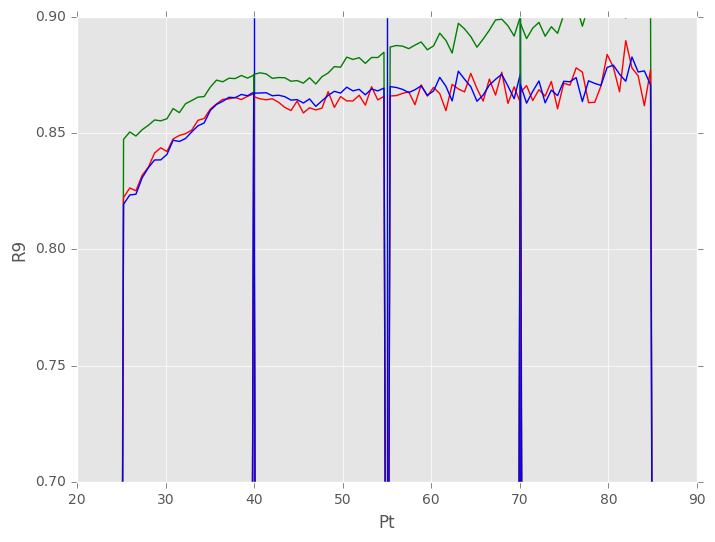

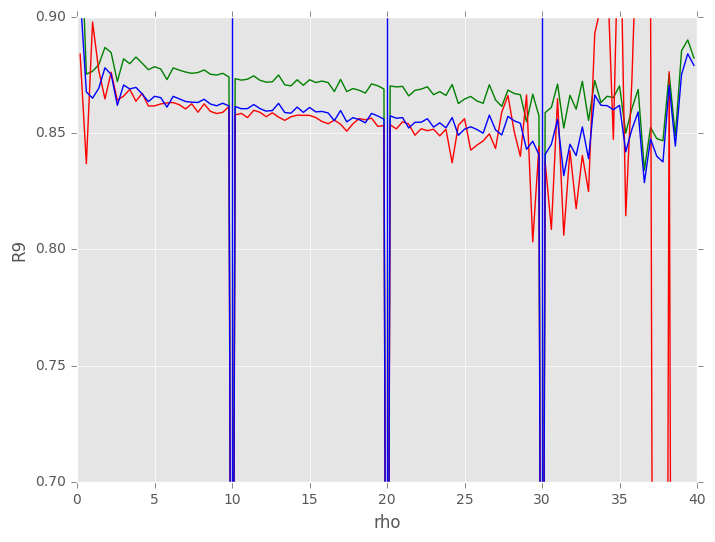

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook
plt.style.use('ggplot')


# split profiles in 4 sections in scEta
dfmcEB1   = dfmc  .query('-1< ScEta & ScEta <1') # ('abs(ScEta)<1')
dfmcEB2   = dfmc  .query('(-1.5< ScEta & ScEta <-1) | (1 < ScEta & ScEta <1.5)') # ('1<abs(ScEta)<1.5')

dfmcEE1   = dfmc  .query('(-2< ScEta & ScEta <-1.5) | (1.5 < ScEta & ScEta <2)') # ('1.5<abs(ScEta)<2')
dfmcEE2   = dfmc  .query('(-2.5< ScEta & ScEta <-2) | (2 < ScEta & ScEta <2.5)') # ('2<abs(ScEta)<2.5')

dfdataEB1   = dfdata  .query('-1< ScEta & ScEta <1') # ('abs(ScEta)<1')
dfdataEB2   = dfdata  .query('(-1.5< ScEta & ScEta < -1) | (1 < ScEta & ScEta <1.5)') # ('1<abs(ScEta)<1.5')

dfdataEE1   = dfdata  .query('(-2< ScEta & ScEta <-1.5) | (1.5 < ScEta & ScEta <2)') # ('1.5<abs(ScEta)<2')
dfdataEE2   = dfdata  .query('(-2.5< ScEta & ScEta <-2) | (2< ScEta & ScEta <2.5)') # ('2<abs(ScEta)<2.5')

# split profiles in 4 sections in Pt

dfmcPt1   = dfmc  .query('25< Pt & Pt <40') 
dfmcPt2   = dfmc  .query('40< Pt & Pt <55') 
dfmcPt3   = dfmc  .query('55< Pt & Pt <70') 
dfmcPt4   = dfmc  .query('70< Pt & Pt <85') 

dfdataPt1   = dfdata  .query('25< Pt & Pt <40') 
dfdataPt2   = dfdata  .query('40< Pt & Pt <55') 
dfdataPt3   = dfdata  .query('55< Pt & Pt <70') 
dfdataPt4   = dfdata  .query('70< Pt & Pt <85') 

# split profiles in 4 sections in Rho
dfmcRho1   = dfmc  .query('0< rho & rho <10')
dfmcRho2   = dfmc  .query('10< rho & rho <20')
dfmcRho3   = dfmc  .query('20< rho & rho <30')
dfmcRho4   = dfmc  .query('30< rho & rho <40')

dfdataRho1   = dfdata  .query('0< rho & rho <10')
dfdataRho2   = dfdata  .query('10< rho & rho <20')
dfdataRho3   = dfdata  .query('20< rho & rho <30')
dfdataRho4   = dfdata  .query('30< rho & rho <40')


for yvar in ["R9"]:#, "S4", "SigmaIeIe", "EtaWidth"]:
    yvarcorr = yvar+"_corr"
    print "plotting ", yvar

    if yvar == "R9":
        minEB, maxEB = 0.7, 0.9
        minEE, maxEE = 0.7, 0.9
    

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.set_ylim(minEB,maxEB)
    ax.set_xlabel('ScEta')
    ax.set_ylabel(yvar)
    
    ax.axvline(x=1)
    ax.axvline(x=-1)
    ax.axvline(x=1.5)
    ax.axvline(x=-1.5)
    ax.axvline(x=2)
    ax.axvline(x=-2)
    
    Profile(dfmcEB1['ScEta']  , dfmcEB1[yvar]        ,100,-2.5,2.5,ax,'green')
    Profile(dfdataEB1['ScEta'], dfdataEB1[yvar]      ,100,-2.5,2.5,ax, 'red')
    Profile(dfmcEB1['ScEta']  , dfmcEB1[yvar+'_corr'],100,-2.5,2.5,ax, 'blue')
      
    Profile(dfmcEB2['ScEta']  , dfmcEB2[yvar]        ,100,-2.5,2.5,ax,'green')
    Profile(dfdataEB2['ScEta'], dfdataEB2[yvar]      ,100,-2.5,2.5,ax, 'red')
    Profile(dfmcEB2['ScEta']  , dfmcEB2[yvar+'_corr'],100,-2.5,2.5,ax, 'blue')

    Profile(dfmcEE1['ScEta']  , dfmcEE1[yvar]        ,100,-2.5,2.5,ax,'green')
    Profile(dfdataEE1['ScEta'], dfdataEE1[yvar]      ,100,-2.5,2.5,ax, 'red')
    Profile(dfmcEE1['ScEta']  , dfmcEE1[yvar+'_corr'],100,-2.5,2.5,ax, 'blue')
    
    Profile(dfmcEE2['ScEta']  , dfmcEE2[yvar]        ,100,-2.5,2.5,ax,'green')
    Profile(dfdataEE2['ScEta'], dfdataEE2[yvar]      ,100,-2.5,2.5,ax, 'red')
    Profile(dfmcEE2['ScEta']  , dfmcEE2[yvar+'_corr'],100,-2.5,2.5,ax, 'blue')

   
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.set_ylim(minEB,maxEB)
    ax.set_xlabel('Pt')
    ax.set_ylabel(yvar)
    
    ax.axvline(x=40)
    ax.axvline(x=55)
    ax.axvline(x=70)
    
    Profile(dfmcPt1['Pt']  , dfmcPt1[yvar]        ,100,20.,90.,ax, 'green')
    Profile(dfdataPt1['Pt'], dfdataPt1[yvar]      ,100,20.,90.,ax, 'red')
    Profile(dfmcPt1['Pt']  , dfmcPt1[yvar+'_corr'],100,20.,90.,ax, 'blue')

    Profile(dfmcPt2['Pt']  , dfmcPt2[yvar]        ,100,20.,90.,ax, 'green')
    Profile(dfdataPt2['Pt'], dfdataPt2[yvar]      ,100,20.,90.,ax, 'red')
    Profile(dfmcPt2['Pt']  , dfmcPt2[yvar+'_corr'],100,20.,90.,ax, 'blue')
    
    Profile(dfmcPt3['Pt']  , dfmcPt3[yvar]        ,100,20.,90.,ax, 'green')
    Profile(dfdataPt3['Pt'], dfdataPt3[yvar]      ,100,20.,90.,ax, 'red')
    Profile(dfmcPt3['Pt']  , dfmcPt3[yvar+'_corr'],100,20.,90.,ax, 'blue')
    
    Profile(dfmcPt4['Pt']  , dfmcPt4[yvar]        ,100,20.,90.,ax, 'green')
    Profile(dfdataPt4['Pt'], dfdataPt4[yvar]      ,100,20.,90.,ax, 'red')
    Profile(dfmcPt4['Pt']  , dfmcPt4[yvar+'_corr'],100,20.,90.,ax, 'blue')


    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.set_ylim(minEB,maxEB)
    ax.set_xlabel('rho')
    ax.set_ylabel(yvar)
    
    ax.axvline(x=10)
    ax.axvline(x=20)
    ax.axvline(x=30)
    
    Profile(dfmcRho1['rho']  , dfmcRho1[yvar]        ,100,0.,40.,ax, 'green')
    Profile(dfdataRho1['rho'], dfdataRho1[yvar]      ,100,0.,40.,ax, 'red')
    Profile(dfmcRho1['rho']  , dfmcRho1[yvar+'_corr'],100,0.,40.,ax, 'blue')
    
    Profile(dfmcRho2['rho']  , dfmcRho2[yvar]        ,100,0.,40.,ax, 'green')
    Profile(dfdataRho2['rho'], dfdataRho2[yvar]      ,100,0.,40.,ax, 'red')
    Profile(dfmcRho2['rho']  , dfmcRho2[yvar+'_corr'],100,0.,40.,ax, 'blue')
    
    Profile(dfmcRho3['rho']  , dfmcRho3[yvar]        ,100,0.,40.,ax, 'green')
    Profile(dfdataRho3['rho'], dfdataRho3[yvar]      ,100,0.,40.,ax, 'red')
    Profile(dfmcRho3['rho']  , dfmcRho3[yvar+'_corr'],100,0.,40.,ax, 'blue')
    
    Profile(dfmcRho4['rho']  , dfmcRho4[yvar]        ,100,0.,40.,ax, 'green')
    Profile(dfdataRho4['rho'], dfdataRho4[yvar]      ,100,0.,40.,ax, 'red')
    Profile(dfmcRho4['rho']  , dfmcRho4[yvar+'_corr'],100,0.,40.,ax, 'blue')
